# Masking Data


---

## Learning Objectives 


- Provide an overview of masking data in xarray
- Masking data using `.where()` method

## Prerequisites


| Concepts | Importance | Notes |
| --- | --- | --- |
| [Understanding of xarray core data structures](./01-xarray-fundamentals.ipynb) | Necessary | |
| [Familiarity with NumPy ](https://numpy.org/doc/stable/reference/arrays.indexing.html) | Helpful | |

- **Time to learn**: *10 minutes*



---

## Overview

Using `xr.where()` or `.where()` method, elements of an Xarray Dataset or xarray DataArray that satisfy a given condition or multiple conditions can be replaced/masked.To demonstrate this, we are going to use the `.where()` method on the `tos` dataarray. 

## Imports


In [2]:
import matplotlib.pyplot as plt
import xarray as xr

Open the sea surface temperature dataset:

In [3]:
ds = xr.open_dataset(
    "./data/tos_Omon_CESM2_historical_r11i1p1f1_gr_200001-201412.nc", engine="netcdf4"
)
ds

/home/iegor/miniconda3/envs/xarray-tutorial/lib/python3.9/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object ...
    lat_bnds   (lat, d2) float64 ...
    lon_bnds   (lon, d2) float64 ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

## Using `where` with one condition

In [4]:
sample = ds.tos.isel(time=-1)
sample

<xarray.DataArray 'tos' (lat: 180, lon: 360)>
[64800 values with dtype=float32]
Coordinates:
    time     object 2014-12-15 12:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

Before applying `.where()`, let's look at the documentation

In [ ]:
sample.where?

- As the documention points out, the conditional expression in `.where` can be: 

    - a DataArray
    - a Dataset
    - a function

- Unlike `.isel()` and `sel()` that change the shape of the returned results, `.where()` preserves the shape of the original data. It does accomplishes this by returning values from the original DataArray or Dataset if the `condition` is `True`, and fills in missing values wherever the `condition` is `False`. 


For demonstration purposes, let's use where to mask locations with temperature values greater than `0`:

In [9]:
masked_sample = sample.where(sample < 0.0)
masked_sample

<xarray.DataArray 'tos' (lat: 180, lon: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.7561191, -1.7561648, -1.7562052, ..., -1.7559224, -1.7559862,
        -1.7560585],
       [-1.7506379, -1.7506577, -1.7506672, ..., -1.7505083, -1.750561 ,
        -1.7506049],
       [-1.7462697, -1.7462667, -1.7462606, ..., -1.7463093, -1.746299 ,
        -1.7462848]], dtype=float32)
Coordinates:
    time     object 2014-12-15 12:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

Let's plot both our original sample, and the masked sample:

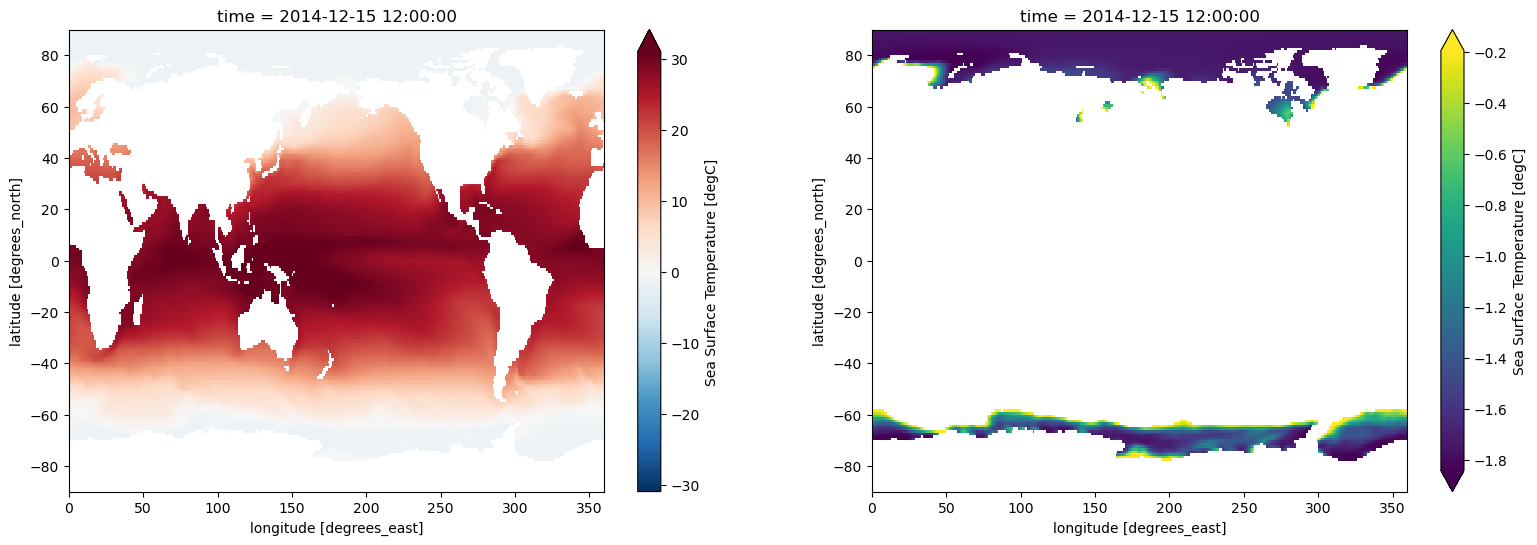

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(19, 6))
sample.plot(ax=axes[0], robust=True)
masked_sample.plot(ax=axes[1], robust=True);

## Using `where` with multiple conditions

`.where()` allows providing multiple conditions. To do this, we need to make sure each conditional expression is enclosed in `()`. To combine conditions, we use the `bit-wise and` (`&`) operator and/or the `bit-wise or` (`|`). let's use `where` to mask locations with temperature values less than 25 and greater than 30:

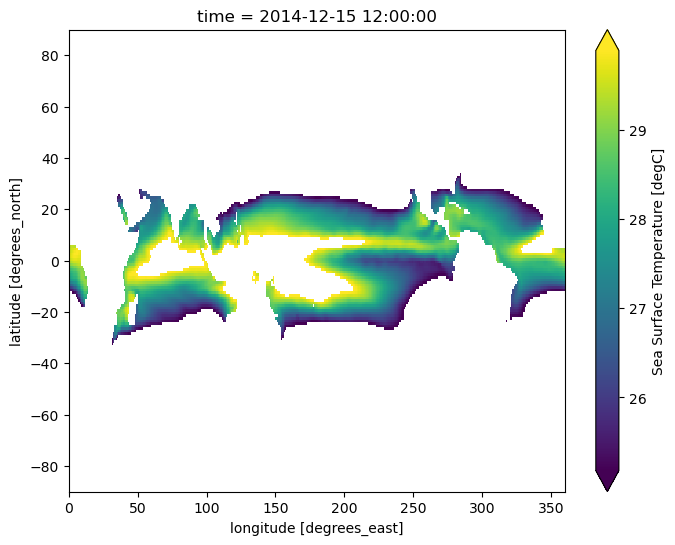

In [13]:
sample.where((sample > 25) & (sample < 30)).plot(size=6, robust=True);

We can use coordinates to apply a mask as well. Below, we use the `latitude` and `longitude` coordinates to mask the [Niño 3.4 region](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/):

![](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/nino-regions.gif)



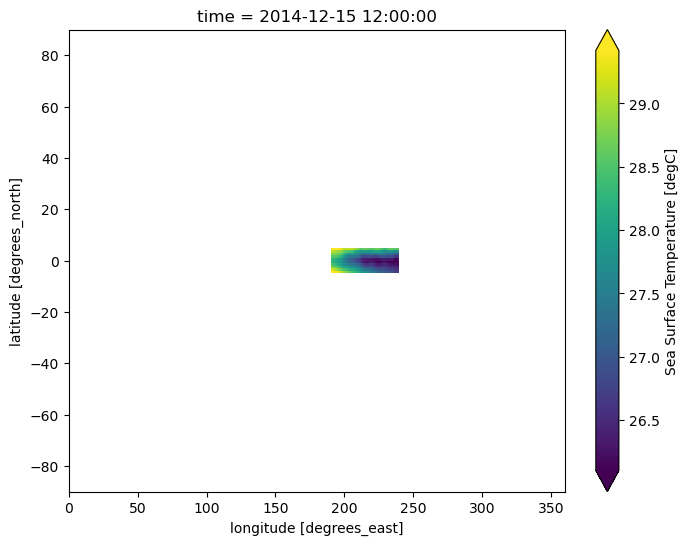

In [14]:
sample.where((sample.lat < 5) & (sample.lat > -5) & (sample.lon > 190) & (sample.lon < 240)).plot(
    size=6, robust=True
);

## Using `where` with a custom fill value

`.where()` can take a second argument, which, if supplied, is used to fill value for the masked region. Below we fill masked regtions with a constant `0`

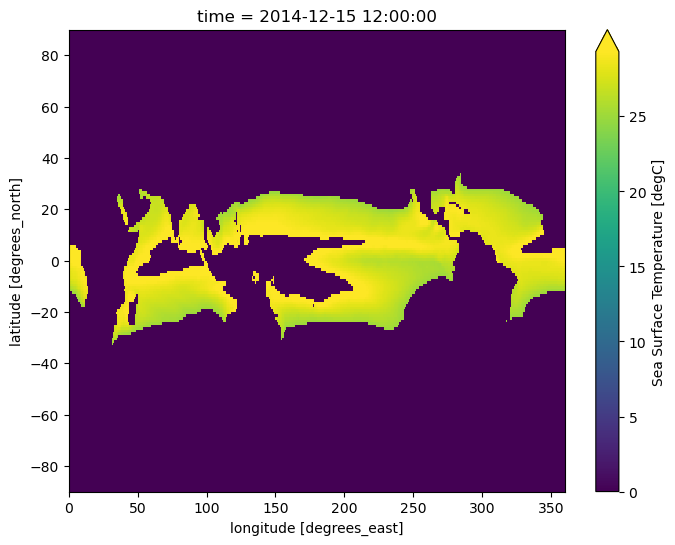

In [18]:
sample.where((sample > 25) & (sample < 30), 0).plot(size=6, robust=True);

---

In [ ]:
%load_ext watermark
%watermark --time --python --updated --iversion

## Resources and References

- [Xarray Documentation - Masking with `where()`](https://xarray.pydata.org/en/stable/user-guide/indexing.html#masking-with-where)

<div class="admonition alert alert-success">
    <p class="title" style="font-weight:bold">Previous: <a href="./04-computation.ipynb">Computation</a></p>
    <p class="title" style="font-weight:bold">Next: <a href="./06-end-to-end-example.ipynb">End-to-End example: Computing Niño 3.4 Index </a></p>
</div>